# Re-entering high students & passing scores on the Reading, Language and Math high school equivalency test (by application date) 

In [1]:
import pandas as pd
from sqlalchemy import create_engine
from datetime import datetime 
import matplotlib.pyplot as plt

In [2]:
# Store CSV into DataFrame
csv_file_app_date = "CorpsNet Data app date.csv"
CorpsNet_app_df = pd.read_csv(csv_file_app_date)
CorpsNet_app_df.head()

,Unnamed: 0,Test Date,Score,Is Passing Score,Last Name,First Name,Application Date,Test,Test Grouping
0,View/Edit,10/24/2014,226.0,False,Aaron,Adriana,NaN,Math,NWEA
1,View/Edit,10/6/2014,0.0,False,Aaron,Adriana,NaN,Mural,Seminars
2,View/Edit,9/30/2014,100.0,True,Aaron,Adriana,NaN,Corpsmember Evaluation,Evaluation
3,View/Edit,9/2/2014,100.0,True,Aaron,Adriana,NaN,Science,Seminars
4,View/Edit,8/31/2014,100.0,True,Aaron,Adriana,NaN,Corpsmember Evaluation,Evaluation


In [3]:
# Clean DataFrame
# Create new data frame with select columns, combine 'First' and 'Last' name to one column, & select only NWEA scores.
CorpsNet_app_df = CorpsNet_app_df[['Test Date', 'Score', 'Is Passing Score', 'Last Name', 'First Name', 'Application Date', 'Test', 'Test Grouping']].copy()
CorpsNet_app_df["Name"] = CorpsNet_app_df["Last Name"] + CorpsNet_app_df["First Name"] 
CorpsNet_app_df = CorpsNet_app_df[['Name','Test Date', 'Score', 'Is Passing Score', 'Application Date', 'Test', 'Test Grouping']].copy()
NWEA_app_df = CorpsNet_app_df[CorpsNet_app_df['Test Grouping'] == 'NWEA']
NWEA_app_df.head()

,Name,Test Date,Score,Is Passing Score,Application Date,Test,Test Grouping
0,AaronAdriana,10/24/2014,226.0,False,NaN,Math,NWEA
6,AaronAdriana,7/30/2014,232.0,False,NaN,Math,NWEA
14,AaronAdriana,4/25/2014,232.0,False,NaN,Math,NWEA
15,AaronAdriana,4/23/2014,231.0,True,NaN,Language,NWEA
30,AaronAdriana,1/13/2014,221.0,False,NaN,Math,NWEA


In [4]:
# Convert 'Test Date' and 'Application Date' from objects to datetime
NWEA_app_df[["Test Date", "Application Date"]] = NWEA_app_df[["Test Date", "Application Date"]].astype('datetime64[ns]')
NWEA_app_df.dtypes
NWEA_app_df.head()

C:\Users\314ca\Anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,Name,Test Date,Score,Is Passing Score,Application Date,Test,Test Grouping
0,AaronAdriana,2014-10-24,226.0,False,NaT,Math,NWEA
6,AaronAdriana,2014-07-30,232.0,False,NaT,Math,NWEA
14,AaronAdriana,2014-04-25,232.0,False,NaT,Math,NWEA
15,AaronAdriana,2014-04-23,231.0,True,NaT,Language,NWEA
30,AaronAdriana,2014-01-13,221.0,False,NaT,Math,NWEA


In [ ]:
# newdb = []
# for row in NWEA_df.iterrows():
#     if row[1]['Is Passing Score'] == True:
#         row[1]['Days until Passed'] = row[1]['Test Date'] - row[1]['Start Date']
# #         print(row)

In [5]:
# Calculate days until passed test
NWEA_app_df['Days since Application until Passed'] = ''
Days_app_df = NWEA_app_df.loc[NWEA_app_df['Is Passing Score'] == True]
NWEA_app_df['Days since Application until Passed'] = (Days_app_df['Test Date'] - Days_app_df['Application Date']).apply(lambda x: x.days)

C:\Users\314ca\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\314ca\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [6]:
# Remove unpassed tests
NWEA_app_df = NWEA_app_df.dropna()
NWEA_app_df

,Name,Test Date,Score,Is Passing Score,Application Date,Test,Test Grouping,Days since Application until Passed
52,AaronJessica,2009-02-12,231.0,True,2009-02-12,Math,NWEA,0.0
62,AbarcaLuis,2009-12-07,221.0,True,2009-09-14,Math,NWEA,84.0
141,AbramsTwanish,2013-01-10,232.0,True,2012-06-18,Math,NWEA,206.0
142,AbramsTwanish,2013-01-10,220.0,True,2012-06-18,Reading,NWEA,206.0
143,AbramsTwanish,2013-01-10,220.0,True,2012-06-18,Language,NWEA,206.0
223,AdamsKiauna,2012-06-14,251.0,True,2012-03-19,Math,NWEA,87.0
224,AdamsKiauna,2012-06-14,240.0,True,2012-03-19,Reading,NWEA,87.0
227,AdamsKiauna,2012-06-12,232.0,True,2012-03-19,Language,NWEA,85.0
290,AguelarEmilio,2013-07-29,224.0,True,2012-04-28,Reading,NWEA,457.0
292,AguelarEmilio,2013-07-16,220.0,True,2012-04-28,Language,NWEA,444.0


In [7]:
# Remove negative values 
NWEA_app_positive_df = NWEA_app_df[(NWEA_app_df['Days since Application until Passed']>0)]
NWEA_app_positive_df

,Name,Test Date,Score,Is Passing Score,Application Date,Test,Test Grouping,Days since Application until Passed
62,AbarcaLuis,2009-12-07,221.0,True,2009-09-14,Math,NWEA,84.0
141,AbramsTwanish,2013-01-10,232.0,True,2012-06-18,Math,NWEA,206.0
142,AbramsTwanish,2013-01-10,220.0,True,2012-06-18,Reading,NWEA,206.0
143,AbramsTwanish,2013-01-10,220.0,True,2012-06-18,Language,NWEA,206.0
223,AdamsKiauna,2012-06-14,251.0,True,2012-03-19,Math,NWEA,87.0
224,AdamsKiauna,2012-06-14,240.0,True,2012-03-19,Reading,NWEA,87.0
227,AdamsKiauna,2012-06-12,232.0,True,2012-03-19,Language,NWEA,85.0
290,AguelarEmilio,2013-07-29,224.0,True,2012-04-28,Reading,NWEA,457.0
292,AguelarEmilio,2013-07-16,220.0,True,2012-04-28,Language,NWEA,444.0
342,AguelarEmilio,2012-07-13,225.0,True,2012-04-28,Math,NWEA,76.0


In [8]:
# Set Index
NWEA_app_positive_df.reset_index(level=0, inplace=True)
NWEA_app_positive_df

,index,Name,Test Date,Score,Is Passing Score,Application Date,Test,Test Grouping,Days since Application until Passed
0,62,AbarcaLuis,2009-12-07,221.0,True,2009-09-14,Math,NWEA,84.0
1,141,AbramsTwanish,2013-01-10,232.0,True,2012-06-18,Math,NWEA,206.0
2,142,AbramsTwanish,2013-01-10,220.0,True,2012-06-18,Reading,NWEA,206.0
3,143,AbramsTwanish,2013-01-10,220.0,True,2012-06-18,Language,NWEA,206.0
4,223,AdamsKiauna,2012-06-14,251.0,True,2012-03-19,Math,NWEA,87.0
5,224,AdamsKiauna,2012-06-14,240.0,True,2012-03-19,Reading,NWEA,87.0
6,227,AdamsKiauna,2012-06-12,232.0,True,2012-03-19,Language,NWEA,85.0
7,290,AguelarEmilio,2013-07-29,224.0,True,2012-04-28,Reading,NWEA,457.0
8,292,AguelarEmilio,2013-07-16,220.0,True,2012-04-28,Language,NWEA,444.0
9,342,AguelarEmilio,2012-07-13,225.0,True,2012-04-28,Math,NWEA,76.0


In [9]:
# Check data type
NWEA_app_positive_df.dtypes

index                                           int64
Name                                           object
Test Date                              datetime64[ns]
Score                                         float64
Is Passing Score                                 bool
Application Date                       datetime64[ns]
Test                                           object
Test Grouping                                  object
Days since Application until Passed           float64
dtype: object

In [10]:
# Convert Data frame to CSV
NWEA_app_positive_df.to_csv('NWEA_Application_Date.csv')

In [11]:
# Find average days to pass
NWEA_app_average_df = NWEA_app_positive_df.describe()
NWEA_app_average_df

,index,Score,Days since Application until Passed
count,1497.000000,1497.000000,1497.000000
mean,29591.511022,233.211690,397.307949
std,16855.582525,10.727633,685.994839
min,62.000000,215.000000,1.000000
25%,15284.000000,224.000000,36.000000
50%,30152.000000,232.000000,204.000000
75%,44575.000000,239.000000,514.000000
max,57848.000000,280.000000,9159.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x264ea07e630>,
 'caps': [<matplotlib.lines.Line2D at 0x264ea07ef98>,
 'boxes': [<matplotlib.patches.PathPatch at 0x264ea07e3c8>],
 'medians': [<matplotlib.lines.Line2D at 0x264ea087828>],
 'fliers': [<matplotlib.lines.Line2D at 0x264ea087c50>],
 'means': []}

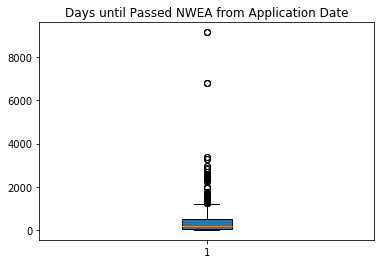

In [15]:
# Make box plot to see spread of data
data = NWEA_app_positive_df['Days since Application until Passed']
fig1, ax1 = plt.subplots()
ax1.set_title('Days until Passed NWEA from Application Date')
ax1.boxplot(data, patch_artist=True)

In [13]:
# Find average days to pass each type of test
NWEA_app_group = NWEA_app_positive_df.groupby(['Test'])['Days since Application until Passed'].mean()
NWEA_app_group

Test
Language    437.214894
Math        391.417495
Reading     367.167939
Name: Days since Application until Passed, dtype: float64

In [14]:
# Find average score for each type of test
NWEA_app_group = NWEA_app_positive_df.groupby(['Test'])['Score'].mean()
NWEA_app_group

Test
Language    231.044043
Math        236.216700
Reading     232.271374
Name: Score, dtype: float64